The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 


Steps to be done are :-

1)Reading, understanding and visualising the data

2)Preparing the data for modelling

3)Building the model

4)Evaluate the model

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## To display columns with any restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


In [3]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Reading the disctionary for better understanding of dataset

df_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

df_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [5]:
## Understanding the details of dataset

df.shape

(99999, 226)

> The dataset has 99,999  rows and 226 columns

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
# Checking percent of missing values in columns

df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


In [9]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [10]:
# Delete the columns having more than 30% missing values

df = df.drop(col_list_missing_30, axis=1)

In [11]:
# List the date columns

date_cols = [i for i in df.columns.to_list() if 'date' in i]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [12]:
# Dropping the date column

df = df.drop(date_cols,axis =1)

In [13]:
## Checking the columns with single value

cols_with_single_value = []
for col in df.columns:
    if  df[col].nunique() == 1:
        cols_with_single_value.append(col)

print(cols_with_single_value)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [14]:
## Introspecting into these columns to check each columns and their values

for col in cols_with_single_value:
    print(col)
    print( df[col].value_counts(dropna=False))
    print("--------------------------------------")

circle_id
109    99999
Name: circle_id, dtype: int64
--------------------------------------
loc_og_t2o_mou
0.0    98981
NaN    1018 
Name: loc_og_t2o_mou, dtype: int64
--------------------------------------
std_og_t2o_mou
0.0    98981
NaN    1018 
Name: std_og_t2o_mou, dtype: int64
--------------------------------------
loc_ic_t2o_mou
0.0    98981
NaN    1018 
Name: loc_ic_t2o_mou, dtype: int64
--------------------------------------
std_og_t2c_mou_6
0.0    96062
NaN    3937 
Name: std_og_t2c_mou_6, dtype: int64
--------------------------------------
std_og_t2c_mou_7
0.0    96140
NaN    3859 
Name: std_og_t2c_mou_7, dtype: int64
--------------------------------------
std_og_t2c_mou_8
0.0    94621
NaN    5378 
Name: std_og_t2c_mou_8, dtype: int64
--------------------------------------
std_og_t2c_mou_9
0.0    92254
NaN    7745 
Name: std_og_t2c_mou_9, dtype: int64
--------------------------------------
std_ic_t2o_mou_6
0.0    96062
NaN    3937 
Name: std_ic_t2o_mou_6, dtype: int64
-------

> Since these columns offer no insights we can drop them

In [15]:
df = df.drop(cols_with_single_value,axis =1)

In [16]:
df.shape

(99999, 166)

**Our analysis is focused on the High value customers (HVC), we have filtered for high value customers to carryout the further analysis. The metric of this filtering of HVC is such that all the customers whose 'Average_rech_amt' of months 6 and 7 greater than or equal to 70th percentile of the 'Average_rech_amt' are considered as High Value Customers.**

In [17]:
## Filter high-value customers

df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

#We are Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7(Good Phase). 
#Then taking the average of the total

In [18]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

# finding the 70th quartile of average amount recharged in month 6 and 7

368.5

In [19]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0

In [20]:
df.shape

(30011, 167)

**We have around 30,000 rows in filtered HVC df**

In [21]:
## Handling missing values in rows > 50%

df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(114, 167)

In [22]:
# Deleting the rows having more than 50% missing values

df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 167)

In [23]:
# Checking for missing values in columns

df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
og_others_9,5.32
roam_ic_mou_9,5.32
loc_og_t2f_mou_9,5.32
loc_og_t2m_mou_9,5.32
isd_og_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2m_mou_9,5.32
loc_ic_t2f_mou_9,5.32
std_og_t2t_mou_9,5.32


> Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record. Lets check mou_9

In [24]:
# Listing the columns of MOU Sep(9) where null value =5.32%

print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())

['og_others_9', 'roam_ic_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2m_mou_9', 'isd_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'loc_ic_mou_9', 'std_og_mou_9', 'std_ic_t2t_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'offnet_mou_9', 'std_ic_t2f_mou_9', 'std_og_t2f_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'loc_og_mou_9', 'isd_ic_mou_9', 'std_og_t2m_mou_9', 'ic_others_9', 'spl_og_mou_9']


In [25]:
# Creating a dataframe in which MOU for Sep(9) are null

df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,NaN,0.00,4.16,0.00,NaN,0.00,0.00,0.00,NaN,0.49,5.53,1.06,NaN,32.04,67.84,32.16,0.0,0.63,0.0,0.0,NaN,0.00,0.00,0.00,NaN,1.36,1.83,0.00,NaN,14,17,14,3,432,328,206,0,36,44,36,0,30,20,0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,502,0.00,0.00,

In [26]:
df_null_mou_9.shape

(1590, 167)

In [27]:
# Deleting the records for which MOU for Sep(9) are null


df = df.drop(df_null_mou_9.index)

In [28]:
# Recheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_t2f_mou_8,0.55
loc_og_t2f_mou_8,0.55
spl_og_mou_8,0.55
loc_og_t2m_mou_8,0.55
loc_ic_t2t_mou_8,0.55
isd_og_mou_8,0.55
loc_ic_t2m_mou_8,0.55
loc_og_t2t_mou_8,0.55
std_og_t2t_mou_8,0.55
loc_ic_mou_8,0.55


Similarly to September month we will be treating null values of _mou_8

In [29]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['loc_ic_t2f_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'isd_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_8', 'loc_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'std_og_mou_8', 'roam_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'offnet_mou_8', 'std_og_t2f_mou_8', 'std_ic_mou_8', 'loc_og_mou_8', 'onnet_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'std_og_t2m_mou_8', 'ic_others_8', 'og_others_8']


In [30]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,19,10,0,4,717,220,0,0,110,50,0,0,27,30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,532.742,546.756,0.0,269.274,1173.39,891.83,NaN,149.34,61.59,137.14,NaN,428.36,0.00,1.48,Na

In [31]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [32]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_og_mou_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_og_mou_6,0.44
std_og_t2t_mou_6,0.44
std_og_t2m_mou_6,0.44
std_og_t2f_mou_6,0.44
isd_og_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44


In [33]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['std_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2m_mou_6', 'loc_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'ic_others_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_mou_6', 'loc_og_t2f_mou_6', 'spl_ic_mou_6', 'roam_og_mou_6', 'onnet_mou_6', 'loc_og_t2t_mou_6', 'offnet_mou_6', 'roam_ic_mou_6']


In [34]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]
df_null_mou_6.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,0.00,0.00,NaN,43.76,96.73,56.86,0.0,185.14,219.59,129.19,NaN,0.0,0.0,0.0,NaN,64.56,18.31,9.96,NaN,0.0,0.00,0.0,4,12,24,20,0,970,1104,1214,0,154,154,250,0,50,50,0,0.0,565.78,2108.66,0.00,0.00,0.00,0.00,0.00,0,1,1,0,0,0,2,0,0,0,0,0,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423

In [35]:
# Deleting the records for which MOU for Jun(6) are null

df = df.drop(df_null_mou_6.index)

In [36]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_og_t2m_mou_7,0.12
loc_ic_t2f_mou_7,0.12
og_others_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_mou_7,0.12
ic_others_7,0.12
spl_ic_mou_7,0.12
std_og_mou_7,0.12
loc_ic_t2t_mou_7,0.12


In [37]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['loc_og_t2m_mou_7', 'loc_ic_t2f_mou_7', 'og_others_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_mou_7', 'ic_others_7', 'spl_ic_mou_7', 'std_og_mou_7', 'loc_ic_t2t_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'std_og_t2t_mou_7', 'loc_ic_t2m_mou_7', 'roam_og_mou_7', 'loc_og_t2c_mou_7', 'loc_ic_mou_7', 'std_ic_t2f_mou_7', 'roam_ic_mou_7', 'std_og_t2m_mou_7', 'std_ic_mou_7', 'std_ic_t2m_mou_7', 'offnet_mou_7', 'std_og_t2f_mou_7', 'isd_og_mou_7', 'std_ic_t2t_mou_7', 'onnet_mou_7']


In [38]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29,7.13,NaN,0.00,1.08,0.00,NaN,0.0,0.0,265.41,0.0,26.76,276.16,17.24,NaN,0.60,36.69,130.09,NaN,16.54,110.19,25.46,NaN,8.76,40.24,172.81,NaN,25.91,187.14,1.50,NaN,0.00,0.00,0.41,NaN,0.00,12.29,0.0,NaN,0.00,4.48,1.91,NaN,0.00,16.78,217.33,0.0,43.44,307.43,0.00,NaN,0.00,0.00,42.59,NaN,17.53,103.49,0.00,NaN,0.00,0.00,14,4,4,9,1206,0,223,991,250,0,130,130,250,0,130,130,321.86,0.0,0.00,431.85,0.0,0.0,0.00,0.0,1,0,0,1

In [39]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)


In [40]:
## Finaly checking for null values in dataset

df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_ic_mou_6,0.0
total_ic_mou_8,0.0
total_ic_mou_9,0.0
spl_ic_mou_6,0.0
spl_ic_mou_7,0.0
spl_ic_mou_8,0.0
spl_ic_mou_9,0.0
isd_ic_mou_6,0.0
isd_ic_mou_7,0.0


In [41]:
df.shape

(27991, 167)

> Initially we had around 30K round now around 28K rows , we have lost around 2k rows however we have enough records for analysis.

## Tag churners

We have to tag the churned customers (churn=1, non-churn= 0) based on the Sept month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [42]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,0.00,7.49,8.51,215.58,26.11,255.26,138.29,115.68,38.29,154.58,62.39,308.13,29.79,317.91,151.51,0.00,0.0,1.91,0.0,423.81,68.09,474.41,213.91,968.61,172.58,1144.53,631.86,0.45,0.0,0.0,0.0,245.28,62.11,393.39,259.33,83.48,16.24,21.44,20.31,6,4,11,7,507,253

In [43]:
# Selecting all columns used to define Churn in order to drop then

churn_phase_cols = [col for col in df.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [44]:
# Dropping the churn month columns

df = df.drop(churn_phase_cols, axis=1)

In [45]:
# Dropping sep_vbc_3g column

df = df.drop('sep_vbc_3g', axis=1)

In [46]:
## Checking the class inbalance in data

(df['churn'].value_counts()/len(df))*100

0    96.609625
1    3.390375 
Name: churn, dtype: float64

> There is an imbalance in data, which we need to address later.

In [47]:
#For Numeric analysis and Outlier treatment we are converting the columns - 'mobile_number' and 'churn'as object type data

df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [48]:
# List only the numeric columns

numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=125)


In [49]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
# Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 127)

## Deriving new column decrease_mou_action

In [50]:
#We can use this column to check whether the minutes of usage of the customer has decreased in the action phase than the good phase.

# Average mou at good phase incoming and outgoing( which includes month 6 and 7)
data['avg_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6']+(data['total_og_mou_7'] + data['total_ic_mou_7'])/2)

In [51]:
# Total mou at action phase is sum of incoming and outgoing in action phase (month 8)
data['mou_action'] = ( data['total_og_mou_8'] + data['total_ic_mou_8'])

In [52]:
# Difference avg_mou_good and mou_action

data['diff_mou'] = data['mou_action']- data['avg_mou_good']

In [53]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,mou_action,diff_mou,decrease_mou_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,842.295,188.10,-654.195,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,2058.195,2159.79,101.595,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,1045.455,527.84,-517.615,1
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,

## Deriving new column decrease_rech_amt_action

In [55]:
# Avg rech_amt in action phase
data['avg_rech_amt_good'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2


In [56]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['total_rech_amt_8'] - data['avg_rech_amt_good']

In [57]:

# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,mou_action,diff_mou,decrease_mou_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,842.295,188.10,-654.195,1,519.0,-399.0,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,2058.195,2159.79,101.595,0,380.0,337.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,1045.455,527.84,-517.

## Deriving new column decrease_arpu_action

This column indicates if the average revenue per customer has decreased in the action phase than the good phase.

In [59]:
# arpu in good phase

data['avg_arpu_good'] = (data['arpu_6'] + data['arpu_7'])/2

In [60]:
# Difference of good and action phase ARPU

data['diff_arpu'] =  data['arpu_8'] - data['avg_arpu_good']

In [61]:
# Checking whether the arpu has decreased on the action month

data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,mou_action,diff_mou,decrease_mou_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,842.295,188.10,-654.195,1,519.0,-399.0,1,435.4720,-298.1100,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,2058.195,2159.79,101.595,0,380.0,337.0,0,349.2585,244.0015,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0

## Deriving new column decrease_vbc_action
This column indicates if the volume based cost of the customer has decreased in the action phase than the good phase.

In [62]:
# VBC in good phase 

data['avg_vbc_3g_good'] = (data['jun_vbc_3g'] + data['jul_vbc_3g'])/2

In [63]:
# Difference of good and action phase VBC

data['diff_vbc'] = data['aug_vbc_3g']- data['avg_vbc_3g_good']

In [64]:
# Checking whether the VBC has decreased on the action month

data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,mou_action,diff_mou,decrease_mou_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,842.295,188.10,-654.195,1,519.0,-399.0,1,435.4720,-298.1100,1,516.405,-495.375,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,2058.195,2159.79,101.595,0,380.0,337.0,0,349.2585,244.0015,0,0.000,0.000,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00

## Deriving new column decrease_rech_num_action

In [82]:
#This column indicates if the number of recharge of the customer has decreased in the action phase than the good phase.

# Avg rech number at action phase
data['avg_rech_num_good'] = (data['total_rech_num_6'] + data['total_rech_num_7'])/2
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['total_rech_num_8']-data['avg_rech_num_good']
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,mou_action,diff_mou,decrease_mou_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,842.295,188.10,-654.195,1,519.0,-399.0,1,435.4720,-298.1100,1,516.405,-495.375,1,20.0,-6.0,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,2058.195,2159.79,101.595,0,380.0,337.0,0,349.2585,244.0015,0,0.000,0.000,0,5.0,6.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.

## EDA

In [65]:
## Univariate analysis

## Churn rate vs customer's decreased MOU in action month

# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

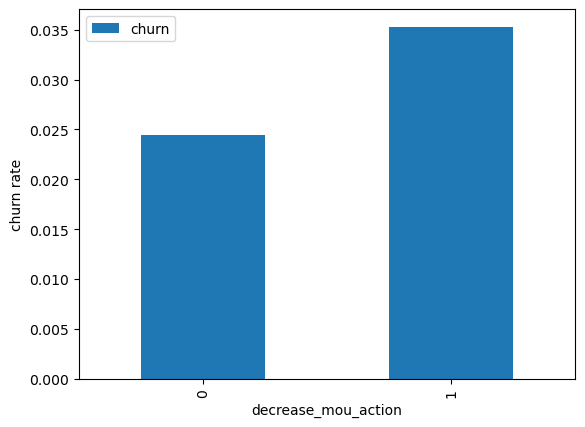

In [66]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

> Observation :  We can see the customer whose churn rate is higher shows a decrease in minutes of usage.

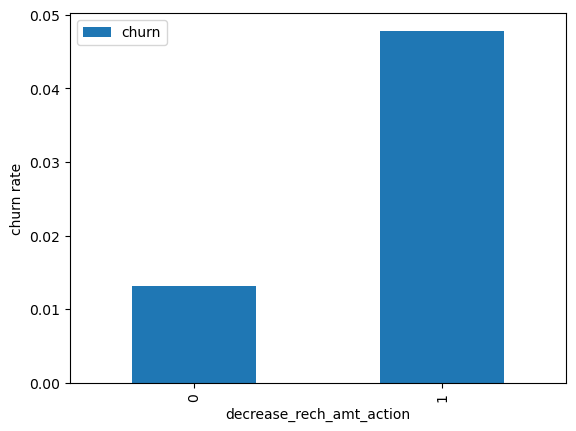

In [69]:
## Churn rate vs customer's  decrease in recharge amount 

data.pivot_table(values='churn', index= 'decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

> Observation : Similar to the previous plot we can observe that churnrate is higher for people who have reduced the amount recharged in action month than in good phase.

## Analysis of the average revenue per customer (churn and not churn) in the action phase

In [74]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

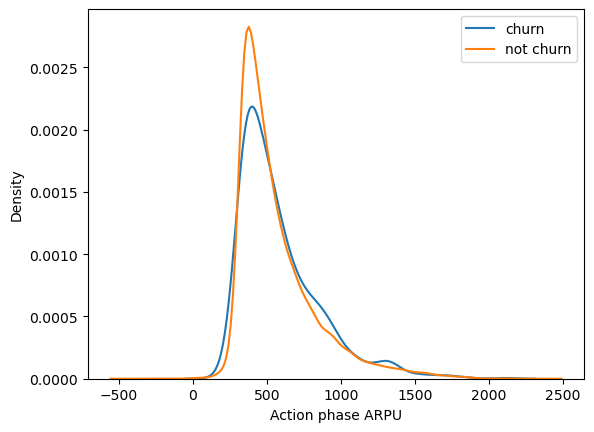

In [78]:
# Dist plot 

ax = sns.distplot(data_churn['avg_arpu_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_good'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')
plt.legend()
plt.show()


Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1200.

## Bivariate analysis

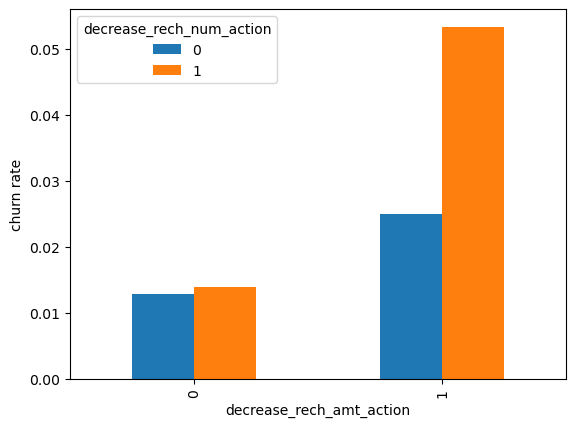

In [84]:
## Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can observe, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

## Analysis of recharge amount and number of recharge in action month


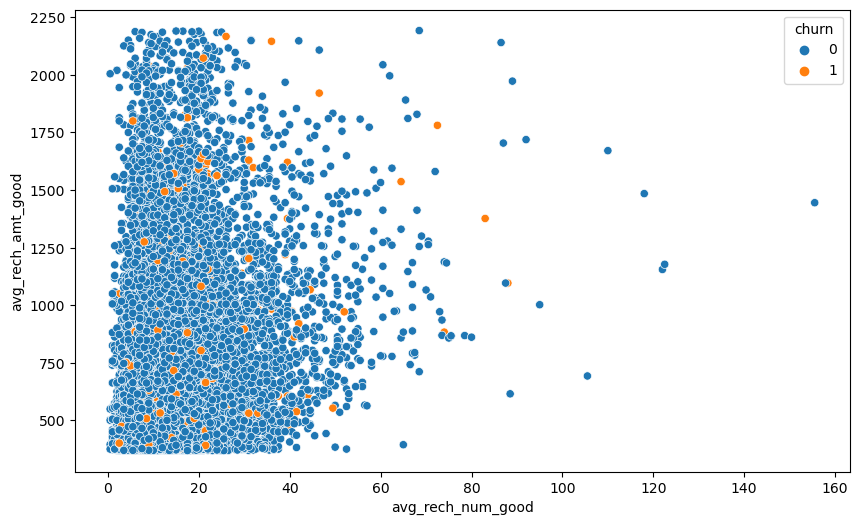

In [88]:
plt.figure(figsize=(10, 6))

# Plot the scatterplot with 'hue' for 'churn'
ax = sns.scatterplot(x='avg_rech_num_good', y='avg_rech_amt_good', hue='churn', data=data)


plt.show()


We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

In [ ]:
## Now we can drop the variable created as they arenot needed for our analysis



In [91]:
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,avg_mou_good,mou_action,diff_mou,decrease_mou_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,avg_arpu_good,diff_arpu,decrease_arpu_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,842.295,188.10,-654.195,1,519.0,-399.0,1,435.4720,-298.1100,1,516.405,-495.375,1,20.0,-6.0,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,2058.195,2159.79,101.595,0,380.0,337.0,0,349.2585,244.0015,0,0.000,0.000,0,5.0,6.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.

In [92]:
data=data.drop(["avg_mou_good","mou_action","diff_mou","decrease_mou_action","avg_rech_amt_good","diff_rech_amt","decrease_rech_amt_action","avg_arpu_good","diff_arpu","decrease_arpu_action","avg_vbc_3g_good","diff_vbc","decrease_vbc_action","avg_rech_num_good","diff_rech_num","decrease_rech_num_action"],axis=1)



In [93]:
## Note since mobile_number is unique id we can remove it for analysis purpose

data= data.drop("mobile_number",axis =1)


In [94]:
## Finally checking our data shape before train- test split

data.shape

(27705, 126)

## Train-Test Split

In [95]:
# Import library
from sklearn.model_selection import train_test_split

# X should not have target variable

X = data.drop(['churn'], axis=1)

# Putting target variable to y

y = data['churn']

# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Dealing with data imbalance

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way.
We are applying the technique.

In [98]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

## Feature Scaling

In [99]:

## Importing library for standardizing Numerical Variable

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the data into scaler and transform
cols_scale = X_train.columns.to_list()
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
0,0.138099,-0.524287,-0.277210,0.107067,-0.662133,-0.465702,-0.212150,-0.635989,0.316602,-0.254930,-0.001299,-0.235845,-0.299924,-0.376405,-0.414431,-0.263290,-0.311912,-0.251552,0.484696,-0.191237,-0.399363,-0.257169,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,0.128525,-0.336170,-0.418989,0.255586,-0.528520,-0.337598,-0.342567,-0.503801,0.649999,-0.144889,-0.14045,-0.119425,-0.048264,-0.731099,0.214395,-0.080736,-0.092210,-0.061548,-0.349272,-0.364631,-0.018022,-0.347135,-0.015583,-0.013735,-0.000842,-0.860270,-0.011338,-0.204497,-0.267019,-0.242904,-0.380904,-0.273133,-0.437678,-0.290227,-0.270855,-0.150113,-0.409476,-0.364422,-0.440556,-0.175817,-0.159844,0.078725,-0.165109,0.366888,-0.117347,-0.136268,-0.137646,-0.110633,-0.235898,0.120717,-0.064064,-0.476525,-0.287711,-0.420934,-0.366938,-0.089565,-0.191817,-0.152636,-0.154479,-0.126705,-0.099701,-0.120560,-0.081522,0.191045,-0.446453,0.304052,0.041674,-0.726612,-0.236245,0.053942,0.023188,0.029579,0.601919,-0.810926,-0.627031,-0.094599,0.700387,1.751483,0.513596,1.201853,-0.241485,3.235900,3.107186,-0.232664,4.035347,2.355546,2.447099,-0.225005,-0.221607,-0.216069,-0.14124,-0.137326,-0.114084,-0.361381,-0.236073,-0.265248,0.110852,-0.426903
1,-1.426806,4.416224,3.251471,-0.658546,-0.237116,-0.004389,-0.775413,2.521574,2.729991,-0.254930,-0.253598,-0.304936,-0.299924,-0.376405,-0.432652,-0.201389,0.270420,0.198129,-0.529895,1.105781,0.288744,-0.276559,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,-0.477412,0.843110,0.290263,-0.570492,-0.320415,-0.040870,-0.512457,2.293280,3.084824,-0.144889,-0.14045,-0.119425,-0.771806,1.366671,2.063557,-0.080736,-0.092210,-0.061548,-0.349272,-0.364631,-0.291120,-0.347135,-0.015583,-0.013735,-0.970474,1.667933,1.938185,-0.411171,0.192864,0.156404,-0.482016,0.744097,0.256463,-0.290227,-0.270855,-0.257736,-0.583618,0.569677,0.219308,-0.216145,-0.200470,-0.112708,-0.355827,0.100267,-0.034671,-0.136268,-0.137646,-0.110633,-0.387063,-0.079206,-0.096244,-0.688938,0.416470,0.125729,-0.366938,-0.089565,-0.191817,-0.152636,-0.154479,-0.126705,-0.099701,-0.120560,-0.081522,-0.739057,4.134464,2.929177,-1.363110,4.091552,3.348154,-0.749947,-0.387207,-0.054886,-0.405504,-0.35021

In [100]:
## Scaling the test set

# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
5704,0.241426,-0.270857,1.004286,-0.725392,-0.690239,-0.476559,0.480613,0.306880,2.321843,-0.077770,-0.253598,-0.304936,0.213029,-0.376405,-0.432652,-0.278196,-0.282988,-0.106923,0.027413,0.005712,0.033944,-0.088284,-0.268141,-0.245271,0.034550,-0.268757,-0.245087,-0.161739,-0.195986,-0.055352,-0.610719,-0.570355,-0.419779,0.345721,0.369717,2.699760,-0.144889,-0.14045,-0.119425,-0.214893,-0.152342,1.550206,-0.080736,-0.09221,-0.061548,1.046227,0.769115,0.756843,0.310975,-0.015583,-0.013735,-0.254734,-0.210329,1.353627,-0.357411,-0.095324,0.281713,0.088773,-0.113229,0.515837,-0.290227,-0.270855,-0.194305,-0.156563,-0.166880,0.468091,-0.216145,-0.200470,-0.187246,0.112473,-0.185608,-0.166229,-0.136268,-0.137646,-0.110633,-0.079108,-0.265838,-0.233517,-0.195250,-0.205183,0.286117,-0.366938,-0.089565,-0.191817,-0.152636,0.283914,-0.126705,-0.099701,-0.12056,-0.081522,-0.157743,0.258304,1.304100,0.084981,-0.238428,0.816186,0.053942,-0.174410,0.029579,0.175702,0.368491,-0.352081,3.322563,2.186970,-0.098368,-0.263171,-0.064325,0.507365,3.235900,-0.251023,-0.232664,0.459436,2.355546,2.447099,-0.225005,-0.221607,-0.216069,1.303180,1.208915,2.526212,0.224938,0.018315,0.195420,-0.259107,-0.097181
64892,0.045864,-0.780568,-0.158953,-0.734179,-0.698080,-0.502143,-0.359083,-0.577343,-0.256317,0.022647,-0.253598,-0.304936,-0.120567,-0.376405,-0.432652,-0.278359,-0.302953,-0.174725,-0.300718,-0.204587,-0.296065,-0.262173,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,-0.379480,-0.338577,-0.306903,-0.619861,-0.570355,-0.415489,-0.232172,-0.436745,-0.040625,-0.144889,-0.14045,-0.104453,-0.616567,-0.714280,-0.305692,-0.080736,-0.09221,-0.061548,-0.328949,-0.364631,-0.291120,-0.347135,-0.015583,-0.013735,-0.776089,-0.845186,-0.422237,-0.108509,-0.347909,-0.187577,0.377466,0.198985,0.240809,-0.275563,-0.257474,-0.235189,0.172282,-0.079190,0.045787,-0.216145,-0.152046,0.151044,2.983478,2.166636,2.203983,0.945126,2.853020,1.082460,1.931518,1.670541,1.889022,1.031603,0.757177,0.715845,-0.366938,-0.089565,-0.191817,0.310494,-0.022301,-0.126705,-0.049943,4.58342,0.366609,-0.041480,-0.681371,0.054040,0.057914,-0.689468,-0.052187,0.053942,0.357584,0.551727,-0.599239,-0.350216,-0.627031,3.

## Correlation between variable

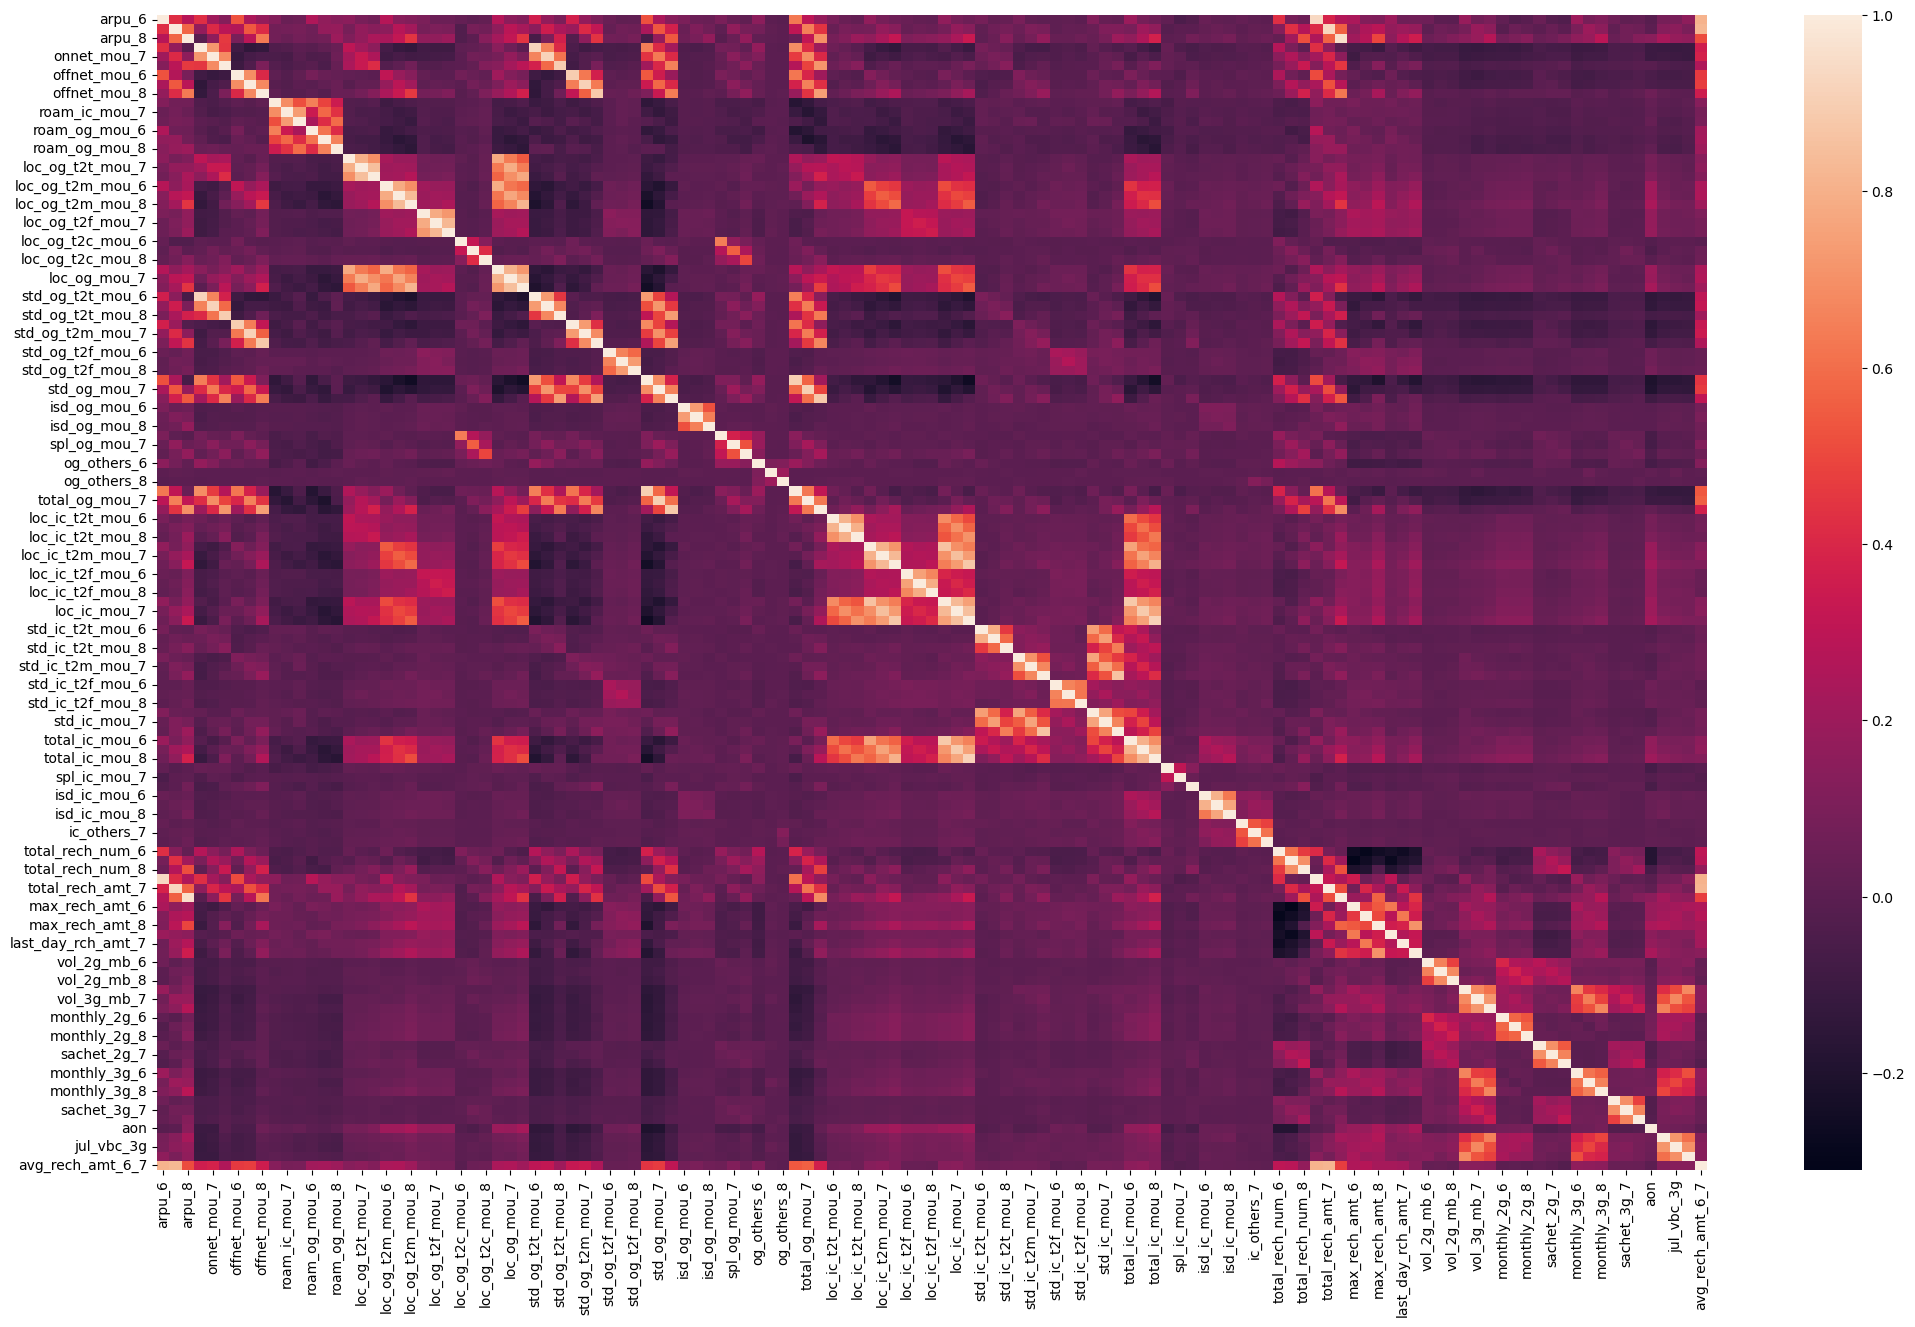

In [101]:
plt.figure(figsize = (25,15))
sns.heatmap(X_train.corr())
plt.show()

There are alot of variable with collinearity , which we will get to know more in variable selection

## Model Building- Logistic Regression with RFE

In [105]:
## Importing stats model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Instantiate the model
logreg = LogisticRegression()

#using RFE lets select the 15 best variables
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [107]:
## list of features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 103),
 ('arpu_7', False, 37),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 48),
 ('onnet_mou_7', False, 26),
 ('onnet_mou_8', False, 27),
 ('offnet_mou_6', False, 69),
 ('offnet_mou_7', False, 15),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 50),
 ('roam_ic_mou_7', False, 63),
 ('roam_ic_mou_8', False, 23),
 ('roam_og_mou_6', False, 71),
 ('roam_og_mou_7', False, 87),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 49),
 ('loc_og_t2t_mou_7', False, 24),
 ('loc_og_t2t_mou_8', False, 28),
 ('loc_og_t2m_mou_6', False, 30),
 ('loc_og_t2m_mou_7', False, 10),
 ('loc_og_t2m_mou_8', False, 14),
 ('loc_og_t2f_mou_6', False, 57),
 ('loc_og_t2f_mou_7', False, 109),
 ('loc_og_t2f_mou_8', False, 56),
 ('loc_og_t2c_mou_6', False, 82),
 ('loc_og_t2c_mou_7', False, 101),
 ('loc_og_t2c_mou_8', False, 81),
 ('loc_og_mou_6', False, 73),
 ('loc_og_mou_7', False, 97),
 ('loc_og_mou_8', False, 72),
 ('std_og_t2t_mou_6', False, 19),
 ('std_og_t2t_mou_7', False, 25),
 (

In [108]:
#15 selected columns by RFE
select_cols= X_train.columns[rfe.support_]
print(select_cols)

Index(['arpu_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_mou_8', 'ic_others_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'monthly_2g_8', 'monthly_3g_8', 'avg_rech_amt_6_7'],
      dtype='object')


In [111]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[select_cols])

#Instantiate the model
log_m1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_m1 = log_m1.fit()

log_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 05 Jan 2025   Deviance:                       4616.3
Time:                        20:55:57   Pearson chi2:                 1.92e+06
No. Iterations:                    47   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4163.1108      2e+05      0.021      0.983   -3.89e+05    3.97e+05
arpu_8              -0.6867      0.111     -6.183      0.000      -0.904      -0.469
offnet_mou_8        -0.8074      0.279     -2.898      0.004      -1.354      -0.261
roam_og_mou_8        0.4445      0.061      7.331      0.000       0.326       0.563
std_og_t2m_mou_8     0.7263      0.261      2.780      0.005       0.214       1.238
std_og_mou_8         1.2093      0.435      2.782      0.005       0.357       2.061
isd_og_mou_8        -1.3501      0.871     -1.551      0.121      -3.056       0.356
og_others_8      -3228.1088   3.14e+05     -0.010      0.992   -6.19e+05    6.13e+05
total_og_mou_8      -1.5474      0.499     -3.103      0.002      -2.525      -0.570
loc_ic_mou_8        -2.7897      0.250    -11.155      0.000      -3.280      -2.300
ic_others_8         -1.3399      0.471     -2.845      0.004      -2.263      -0.417
total_rech_amt_6 -3.255e+06   1.55e+08     -0.021      0.983   -3.07e+08       3e+08
total_rech_amt_7 -3.321e+06   1.58e+08     -0.021      0.983   -3.13e+08    3.06e+08
monthly_2g_8        -0.3393      0.072     -4.726      0.000      -0.480      -0.199
monthly_3g_8        -0.6408      0.119     -5.408      0.000      -0.873      -0.409
avg_rech_amt_6_7  5.344e+06   2.54e+08      0.021      0.983   -4.93e+08    5.04e+08
====================================================================================
"""

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[select_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[select_cols].values, i) for i in range(X_train[select_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,avg_rech_amt_6_7,1553479.84
11,total_rech_amt_7,600025.55
10,total_rech_amt_6,576458.57
1,offnet_mou_8,14.76
7,total_og_mou_8,14.03
3,std_og_t2m_mou_8,13.98
4,std_og_mou_8,12.91
0,arpu_8,4.58
2,roam_og_mou_8,1.76
8,loc_ic_mou_8,1.62
